In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
%matplotlib inline

dtype:uint8
shape:(298, 299)


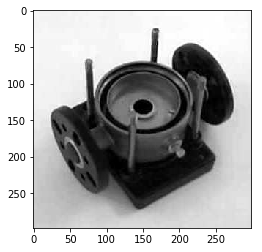

In [2]:
input_image=cv2.imread('wheel.png',cv2.IMREAD_GRAYSCALE)
print('dtype:'+str(input_image.dtype))
print('shape:'+str(input_image.shape))
plt.imshow(input_image,cmap='gray')

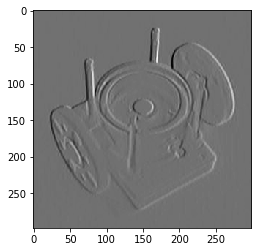

In [3]:
ddepth=cv2.CV_64F
dx=1
dy=0
sobelx=cv2.Sobel(input_image,ddepth,dx,dy)
plt.imshow(sobelx,cmap='gray')

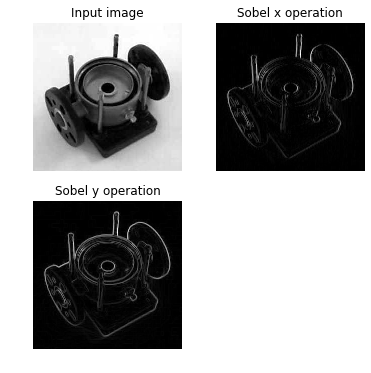

In [4]:
sobelx=cv2.Sobel(input_image,cv2.CV_64F,1,0)
sobely=cv2.Sobel(input_image,cv2.CV_64F,0,1)
sobel=cv2.sqrt(cv2.addWeighted(cv2.pow(sobelx,2.0),1.0,cv2.pow(sobely,2.0),1.0,0.0))
plt.figure(figsize=(6,6));
plt.subplot(2,2,1);plt.title('Input image');plt.axis('off');
plt.imshow(input_image,cmap='gray');
plt.subplot(2,2,2);plt.title('Sobel x operation');
plt.axis('off');
plt.imshow(cv2.absdiff(sobelx,0.0),cmap='gray')
plt.subplot(2,2,3);plt.title('Sobel y operation');
plt.axis('off');
plt.imshow(sobel,cmap='gray')

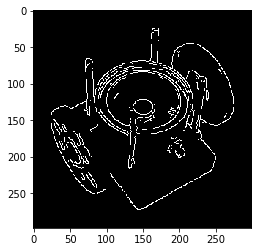

In [5]:
threshold1=100
threshold2=200
canny=cv2.Canny(input_image,threshold1,threshold2)
plt.imshow(canny,cmap='gray')

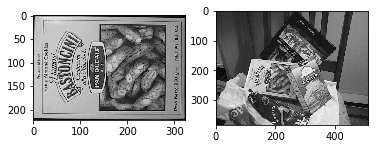

In [9]:
img1=cv2.imread('images/box.png')
img2=cv2.imread('images/box_in_scene.png')
plt.subplot(1,2,1);
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2);
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))

In [2]:
import cv2
sift=cv2.xfeatures2d.SIFT_create()
gray1=cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
gray2=cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
start_time=time.time()
kp1,des1=sift.detectAndComputer(gray1,None)
kp2,des2=sift.detectAndComputer(gray2,None)
print('Elapsed time: %.6s' %(time.time().start_time))
print('Image 1: %d feature detected' %des1.shape[0])
print('Image 2: %d feature detected' %des2.shape[0])


error: OpenCV(4.1.0) C:\projects\opencv-python\opencv_contrib\modules\xfeatures2d\src\sift.cpp:1207: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'cv::xfeatures2d::SIFT::create'


In [3]:
good_matches=[]
for m,n in matches:
    if m.distance<0.75*n.distance:
        good_matches.append(m)
print('%d matches'%len(good_matches))

NameError: name 'matches' is not defined

In [18]:
bf=cv2.BFMatcher(cv2.NORM_L2)
matches=bf.atch(des1,des2,k=2)
print('%d matches'%len(matches))

AttributeError: 'cv2.BFMatcher' object has no attribute 'atch'

True

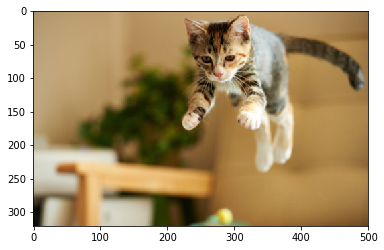

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

#reading the image 

image = cv2.imread('index.png')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
#plotting the image
plt.imshow(image)

#saving image
cv2.imwrite('test_write.jpg',image)


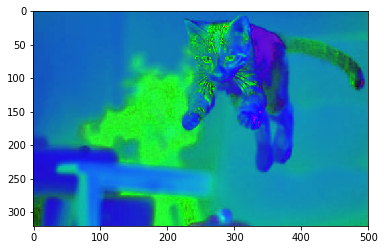

In [10]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 
%matplotlib inline 
image = cv2.imread('index.png') 
#converting image to Gray scale 
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
#plotting the grayscale image
plt.imshow(gray_image) 
#converting image to HSV format
hsv_image = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
#plotting the HSV image
plt.imshow(hsv_image)

In [16]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
#reading the image 
image = cv2.imread('index.png') 
#converting image to size (100,100,3) 
smaller_image = cv2.resize(image,(100,100),interpolation='linear') 
#plot the resized image
plt.imshow(smaller_image)

TypeError: an integer is required (got type str)

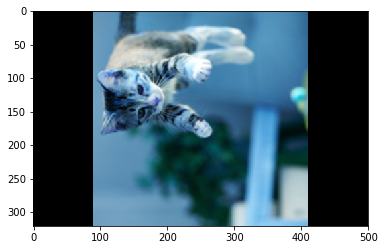

In [17]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 
%matplotlib inline 
image = cv2.imread('index.png') 
rows,cols = image.shape[:2] 
#(col/2,rows/2) is the center of rotation for the image 
# M is the cordinates of the center 
M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1) 
dst = cv2.warpAffine(image,M,(cols,rows)) 
plt.imshow(dst)

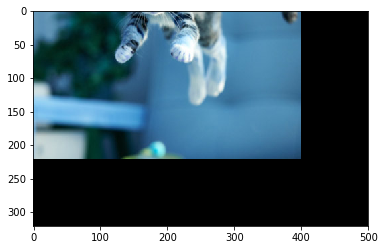

In [18]:
#importing the required libraries 
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 
%matplotlib inline 
#reading the image
image = cv2.imread('index.png')
#shifting the image 100 pixels in both dimensions
M = np.float32([[1,0,-100],[0,1,-100]]) 
dst = cv2.warpAffine(image,M,(cols,rows)) 
plt.imshow(dst)

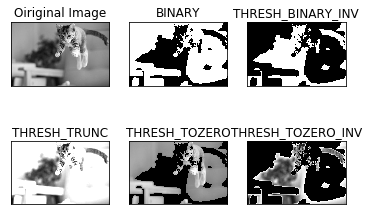

In [20]:
#importing the required libraries 
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 
%matplotlib inline 

#here 0 means that the image is loaded in gray scale format
gray_image = cv2.imread('index.png',0)

ret,thresh_binary = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY)
ret,thresh_binary_inv = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY_INV)
ret,thresh_trunc = cv2.threshold(gray_image,127,255,cv2.THRESH_TRUNC)
ret,thresh_tozero = cv2.threshold(gray_image,127,255,cv2.THRESH_TOZERO)
ret,thresh_tozero_inv = cv2.threshold(gray_image,127,255,cv2.THRESH_TOZERO_INV)

#DISPLAYING THE DIFFERENT THRESHOLDING STYLES
names = ['Oiriginal Image','BINARY','THRESH_BINARY_INV','THRESH_TRUNC','THRESH_TOZERO','THRESH_TOZERO_INV']
images = gray_image,thresh_binary,thresh_binary_inv,thresh_trunc,thresh_tozero,thresh_tozero_inv

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(names[i])
    plt.xticks([]),plt.yticks([])
    
plt.show()

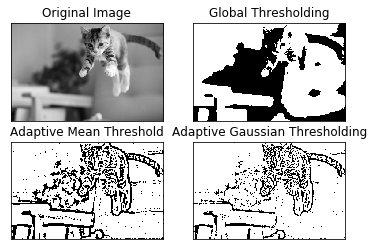

In [21]:
#import the libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

#ADAPTIVE THRESHOLDING
gray_image = cv2.imread('index.png',0)

ret,thresh_global = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY)
#here 11 is the pixel neighbourhood that is used to calculate the threshold value
thresh_mean = cv2.adaptiveThreshold(gray_image,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)

thresh_gaussian = cv2.adaptiveThreshold(gray_image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

names = ['Original Image','Global Thresholding','Adaptive Mean Threshold','Adaptive Gaussian Thresholding']
images = [gray_image,thresh_global,thresh_mean,thresh_gaussian]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(names[i])
    plt.xticks([]),plt.yticks([])
    
plt.show()

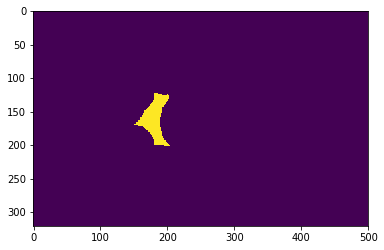

In [23]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

#reading the image
image = cv2.imread('index.png')
#converting image to grayscale format
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
#apply thresholding
ret,thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
#get a kernel
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations = 2)
#extract the background from image
sure_bg = cv2.dilate(opening,kernel,iterations = 3)

dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret,sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_bg)

ret,markers = cv2.connectedComponents(sure_fg)

markers = markers+1

markers[unknown==255] = 0

markers = cv2.watershed(image,markers)
image[markers==-1] = [255,0,0]

plt.imshow(sure_fg)

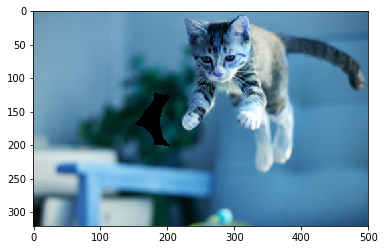

In [24]:
#import required libraries
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 
%matplotlib inline 
#read the image
image = cv2.imread('index.png')
#apply thresholdin 
ret,mask = cv2.threshold(sure_fg,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU) 
#apply AND operation on image and mask generated by thrresholding
final = cv2.bitwise_and(image,image,mask = mask) 
#plot the result
plt.imshow(final)

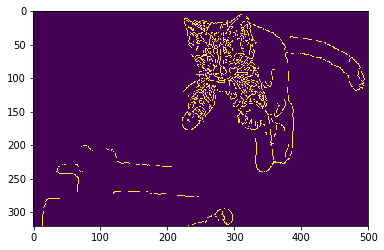

In [26]:
#import the required libraries
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 
%matplotlib inline
#read the image
image = cv2.imread('index.png') 
#calculate the edges using Canny edge algorithm
edges = cv2.Canny(image,100,200) 
#plot the edges
plt.imshow(edges)

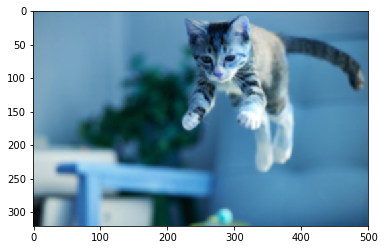

In [28]:
#importing the required libraries 
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 
%matplotlib inline 
image = cv2.imread('index.png') 
#using the averaging kernel for image smoothening 
averaging_kernel = np.ones((3,3),np.float32)/9 
filtered_image = cv2.filter2D(image,-1,kernel) 
plt.imshow(dst) 
#get a one dimensional Gaussian Kernel 
gaussian_kernel_x = cv2.getGaussianKernel(5,1) 
gaussian_kernel_y = cv2.getGaussianKernel(5,1) 
#converting to two dimensional kernel using matrix multiplication 
gaussian_kernel = gaussian_kernel_x * gaussian_kernel_y.T 
#you can also use cv2.GaussianBLurring(image,(shape of kernel),standard deviation) instead of cv2.filter2D 
filtered_image = cv2.filter2D(image,-1,gaussian_kernel) 
plt.imshow(filtered_image)

In [4]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 
%matplotlib inline 
image = cv2.imread('index.png') 
#converting RGB image to Binary 
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) 
ret,thresh = cv2.threshold(gray_image,127,255,0) 
#calculate the contours from binary image
contours = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE) 
with_contours = cv2.drawContours(image,contours,-1,(0,255,0),3) 
plt.imshow(with_contours)

TypeError: contours is not a numpy array, neither a scalar

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#show OpenCV version
print(cv2.__version__)
#read the iamge and convert to grayscale
image = cv2.imread('index.png')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
#create sift object
sift  = cv2.xfeatures2d.SIFT_create()
#calculate keypoints and their orientation
keypoints,descriptors = sift.detectAndCompute(gray,None)
#plot keypoints on the image
with_keypoints = cv2.drawKeypoints(gray,keypoints)
#plot the image
plt.imshow(with_keypoints)

4.1.0


error: OpenCV(4.1.0) C:\projects\opencv-python\opencv_contrib\modules\xfeatures2d\src\sift.cpp:1207: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'cv::xfeatures2d::SIFT::create'


In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

#reading images in grayscale format
image1 = cv2.imread('messi.jpg',0)
image2 = cv2.imread('messi.jpg',0)

#finding out the keypoints and their descriptors
keypoints1,descriptors1 = cv2.detectAndCompute(image1,None)
keypoints2,descriptors2 = cv2.detectAndCompute(image2,None)

#matching the descriptors from both the images 
bf = cv2.BFMatcher()
matches = bf.knnMatch(ds1,ds2,k = 2)


#selecting only the good features
good_matches = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

image3 = cv2.drawMatchesKnn(image1,kp1,image2,kp2,good,flags = 2)

AttributeError: module 'cv2.cv2' has no attribute 'detectAndCompute'

In [10]:
#import required libraries
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

#load the classifiers downloaded 
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv.CascadeClassifier('haarcascade_eye.xml')
#read the image and convert to grayscale format
img = cv.imread('index.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
#calculate coordinates 
faces = face_cascade.detectMultiScale(gray, 1.1, 4)
for (x,y,w,h) in faces:
    cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    #draw bounding boxes around detected features
    for (ex,ey,ew,eh) in eyes:
        cv.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
#plot the image
plt.imshow(img)
#write image 
cv2.imwrite('face_detection.jpg',img)

error: OpenCV(4.1.0) C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [15]:
from __future__ import division
%matplotlib inline
import cv2
import matplotlib
from matplotlib import colors
from matplotlib import pyplot as plt
import numpy as np

In [35]:
def show(image):
    # Figure size in inches
    plt.figure(figsize=(15, 15))
    
    # Show image, with nearest neighbour interpolation
    plt.imshow(image, interpolation='nearest')
    
def show_hsv(hsv):
    rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    show(rgb)
    
def show_mask(mask):
    plt.figure(figsize=(10, 10))
    plt.imshow(mask, cmap='gray')
    
def overlay_mask(mask, image):
    rgb_mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
    img = cv2.addWeighted(rgb_mask, 0.5, image, 0.5, 0)
    show(img)

In [36]:
image = cv2.imread('strawberries.jpg')


In [37]:
image.shape

(590, 874, 3)

In [38]:
import pandas as pd
m,n,r = image.shape
arr = image.reshape(m*n, -1)
df = pd.DataFrame(arr, columns=['b', 'g', 'r'])
df.describe()

,b,g,r
count,515660.000000,515660.000000,515660.000000
mean,78.073915,116.505153,122.662078
std,63.423195,60.121340,59.204967
min,0.000000,0.000000,0.000000
25%,38.000000,78.000000,87.000000
50%,63.000000,114.000000,113.000000
75%,91.000000,144.000000,141.000000
max,255.000000,255.000000,255.000000


In [39]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Resize to a third of the size
image = cv2.resize(image, None, fx=1/3, fy=1/3)

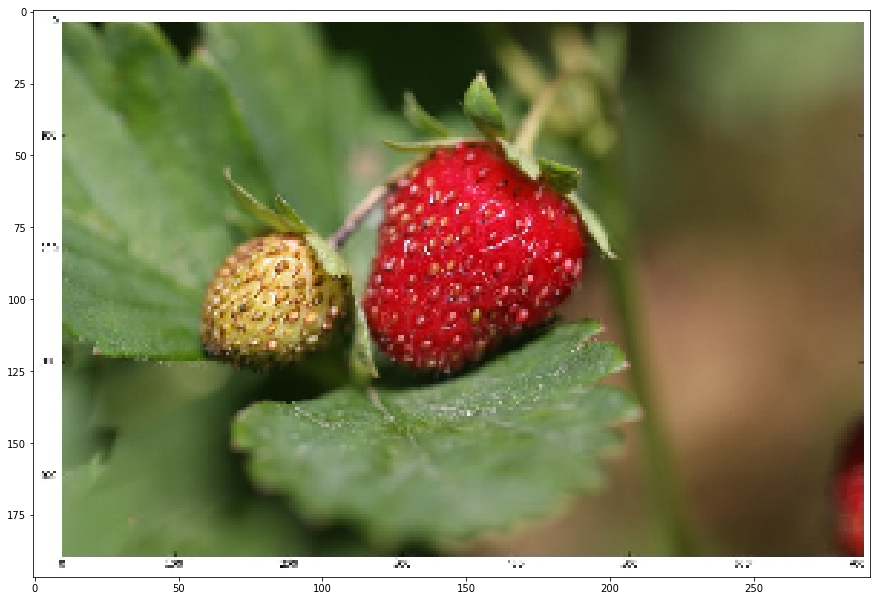

In [40]:
show(image)

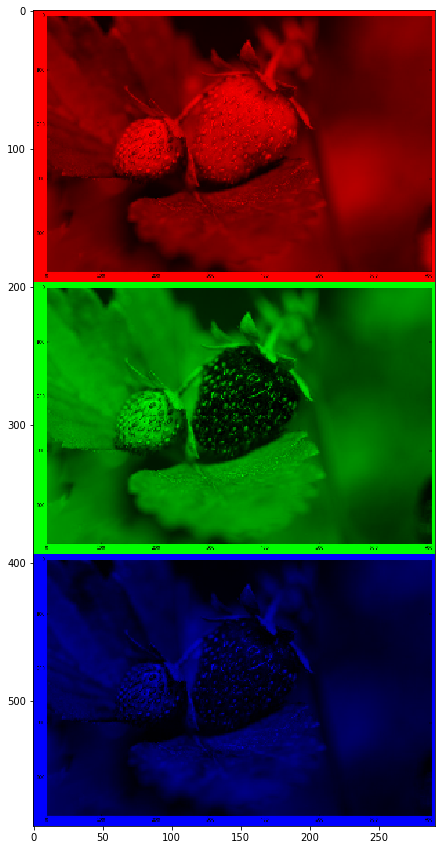

In [41]:
images = []
for i in [0, 1, 2]:
    colour = image.copy()
    if i != 0: colour[:,:,0] = 0
    if i != 1: colour[:,:,1] = 0
    if i != 2: colour[:,:,2] = 0
    images.append(colour)
    
show(np.vstack(images))

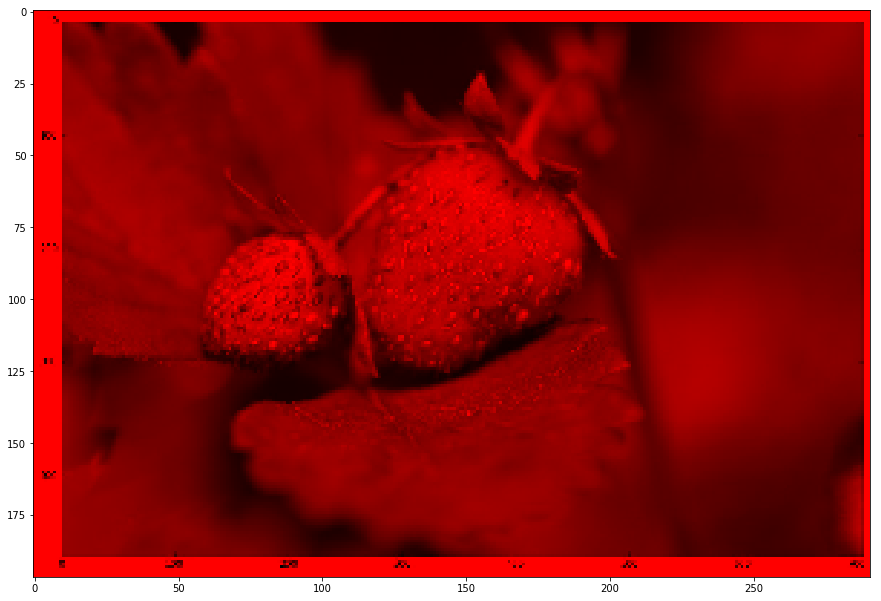

In [46]:
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

images = []
for i in [0, 1, 2]:
    colour = hsv.copy()
    if i != 0: colour[:,:,0] = 0
    if i != 1: colour[:,:,1] = 255
    if i != 2: colour[:,:,2] = 255
images.append(colour)

hsv_stack = np.vstack(images)
rgb_stack = cv2.cvtColor(hsv_stack, cv2.COLOR_HSV2RGB)
show(rgb_stack)

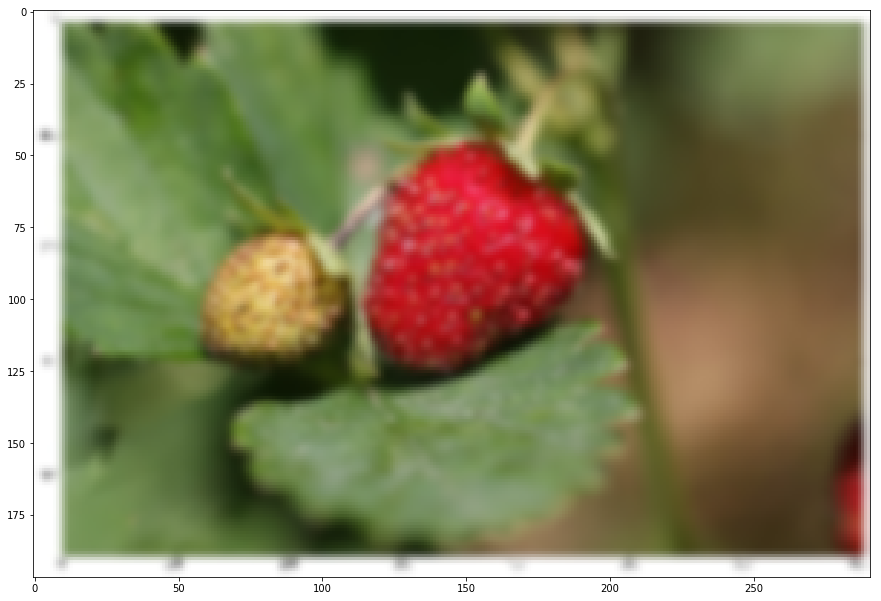

In [47]:
image_blur = cv2.GaussianBlur(image, (7, 7), 0)
show(image_blur)

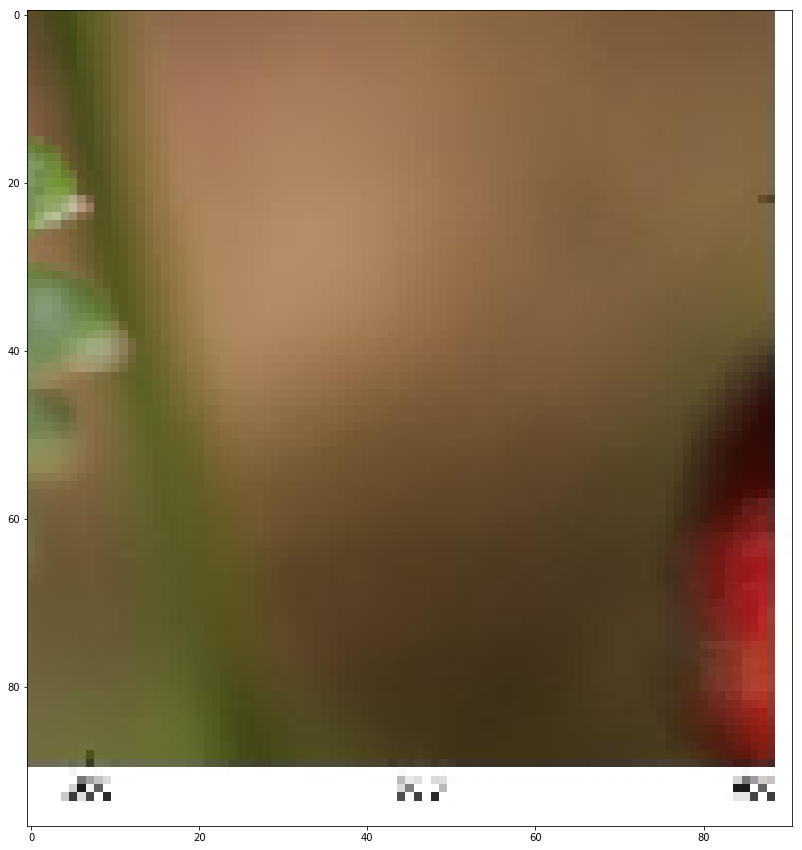

In [50]:
image_cropped = image[100:300, 200:500]
show(image_cropped)

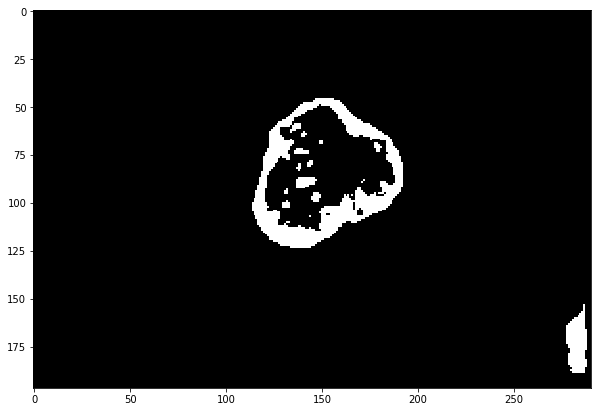

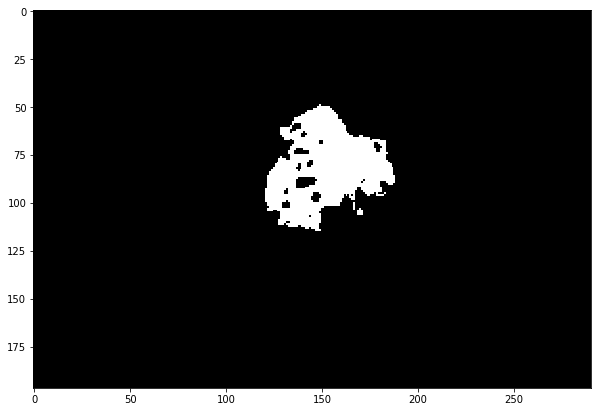

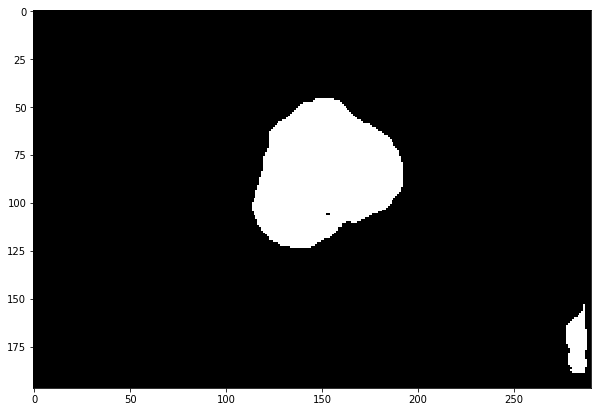

In [51]:
image_blur_hsv = cv2.cvtColor(image_blur, cv2.COLOR_RGB2HSV)

# 0-10 hue
min_red = np.array([0, 100, 80])
max_red = np.array([10, 256, 256])
image_red1 = cv2.inRange(image_blur_hsv, min_red, max_red)

# 170-180 hue
min_red2 = np.array([170, 100, 80])
max_red2 = np.array([180, 256, 256])
image_red2 = cv2.inRange(image_blur_hsv, min_red2, max_red2)

show_mask(image_red1)
show_mask(image_red2)
image_red = image_red1 + image_red2
show_mask(image_red)

In [52]:
image_red

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

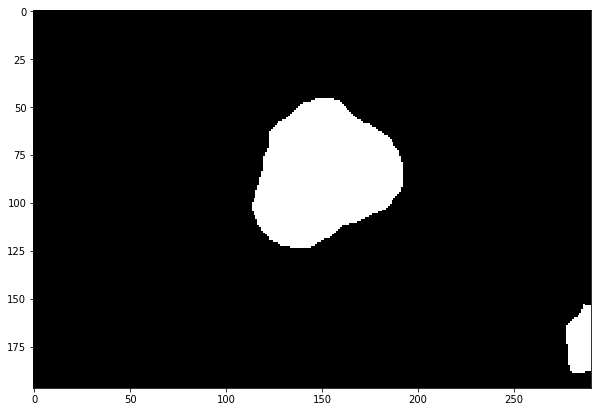

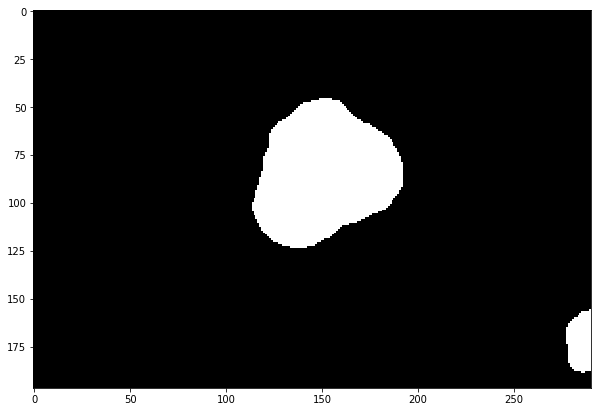

In [53]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))

# image_red_eroded = cv2.morphologyEx(image_red, cv2.MORPH_ERODE, kernel)
# show_mask(image_red_eroded)

# image_red_dilated = cv2.morphologyEx(image_red, cv2.MORPH_DILATE, kernel)
# show_mask(image_red_dilated)

# image_red_opened = cv2.morphologyEx(image_red, cv2.MORPH_OPEN, kernel)
# show_mask(image_red_opened)

# Fill small gaps
image_red_closed = cv2.morphologyEx(image_red, cv2.MORPH_CLOSE, kernel)
show_mask(image_red_closed)

# Remove specks
image_red_closed_then_opened = cv2.morphologyEx(image_red_closed, cv2.MORPH_OPEN, kernel)
show_mask(image_red_closed_then_opened)

2


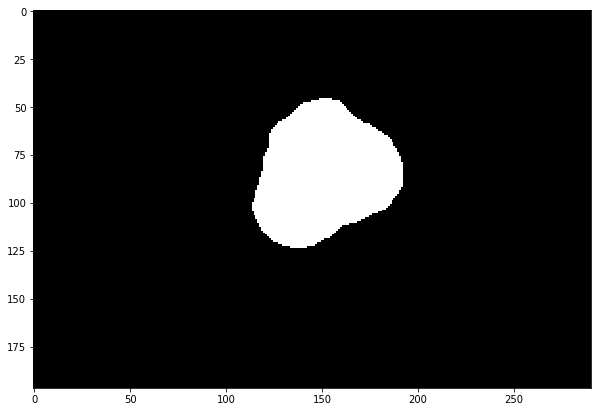

In [55]:
def find_biggest_contour(image):
    
    # Copy to prevent modification
    image = image.copy()
    contours, hierarchy = cv2.findContours(image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    print (len(contours))

    # Isolate largest contour
    contour_sizes = [(cv2.contourArea(contour), contour) for contour in contours]
    biggest_contour = max(contour_sizes, key=lambda x: x[0])[1]
 
    mask = np.zeros(image.shape, np.uint8)
    cv2.drawContours(mask, [biggest_contour], -1, 255, -1)
    return biggest_contour, mask

big_contour, red_mask = find_biggest_contour(image_red_closed_then_opened)
show_mask(red_mask)

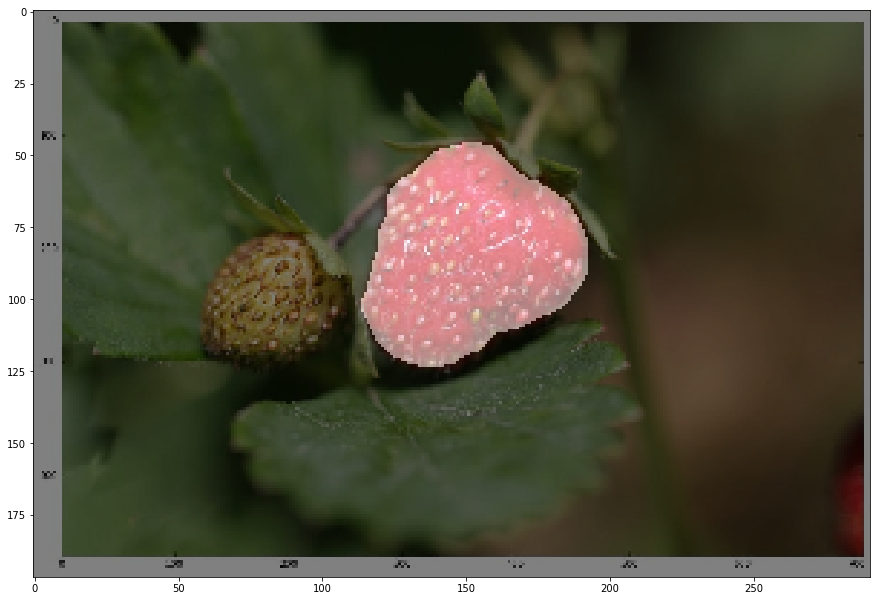

In [56]:
overlay_mask(red_mask, image)

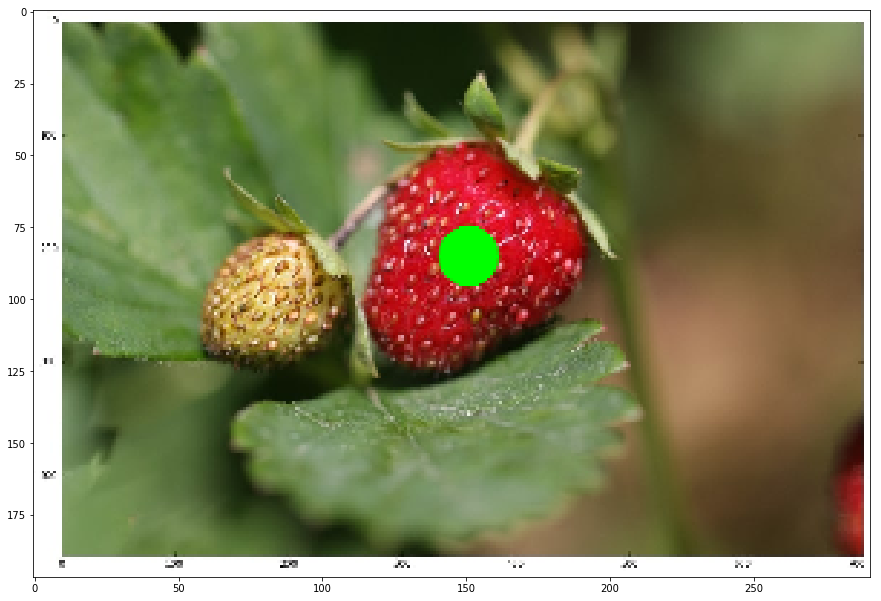

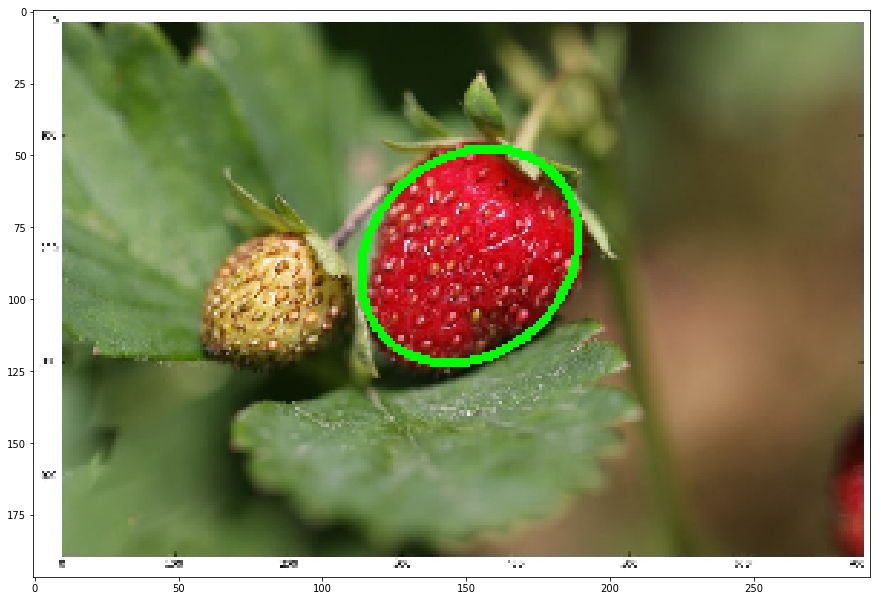

In [59]:
moments = cv2.moments(red_mask)
centre_of_mass = int(moments['m10'] / moments['m00']), int(moments['m01'] / moments['m00'])
image_with_com = image.copy()
cv2.circle(image_with_com, centre_of_mass, 10, (0, 255, 0), -1, cv2.LINE_AA)
show(image_with_com)

# Bounding ellipse
image_with_ellipse = image.copy()
ellipse = cv2.fitEllipse(big_contour)
cv2.ellipse(image_with_ellipse, ellipse, (0,255,0), 2)
show(image_with_ellipse)